In [1]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
with open(r'words.txt', encoding='utf-8') as f:
    rawwordlelist = f.read()
rawwordlelist = rawwordlelist.split(",")
wordList = []
for word in rawwordlelist:
    word = word.strip('"')
    wordList.append(word)
print(wordList)

['cigar', 'rebut', 'sissy', 'humph', 'awake', 'blush', 'focal', 'evade', 'naval', 'serve', 'heath', 'dwarf', 'model', 'karma', 'stink', 'grade', 'quiet', 'bench', 'abate', 'feign', 'major', 'death', 'fresh', 'crust', 'stool', 'colon', 'abase', 'marry', 'react', 'batty', 'pride', 'floss', 'helix', 'croak', 'staff', 'paper', 'unfed', 'whelp', 'trawl', 'outdo', 'adobe', 'crazy', 'sower', 'repay', 'digit', 'crate', 'cluck', 'spike', 'mimic', 'pound', 'maxim', 'linen', 'unmet', 'flesh', 'booby', 'forth', 'first', 'stand', 'belly', 'ivory', 'seedy', 'print', 'yearn', 'drain', 'bribe', 'stout', 'panel', 'crass', 'flume', 'offal', 'agree', 'error', 'swirl', 'argue', 'bleed', 'delta', 'flick', 'totem', 'wooer', 'front', 'shrub', 'parry', 'biome', 'lapel', 'start', 'greet', 'goner', 'golem', 'lusty', 'loopy', 'round', 'audit', 'lying', 'gamma', 'labor', 'islet', 'civic', 'forge', 'corny', 'moult', 'basic', 'salad', 'agate', 'spicy', 'spray', 'essay', 'fjord', 'spend', 'kebab', 'guild', 'aback', 

In [3]:
len(wordList)

12972

In [4]:
# First 2315 words of our list are most frequent wordle answers. so lets extract it too.
curatedWordList = wordList[:2315]
print(curatedWordList)

['cigar', 'rebut', 'sissy', 'humph', 'awake', 'blush', 'focal', 'evade', 'naval', 'serve', 'heath', 'dwarf', 'model', 'karma', 'stink', 'grade', 'quiet', 'bench', 'abate', 'feign', 'major', 'death', 'fresh', 'crust', 'stool', 'colon', 'abase', 'marry', 'react', 'batty', 'pride', 'floss', 'helix', 'croak', 'staff', 'paper', 'unfed', 'whelp', 'trawl', 'outdo', 'adobe', 'crazy', 'sower', 'repay', 'digit', 'crate', 'cluck', 'spike', 'mimic', 'pound', 'maxim', 'linen', 'unmet', 'flesh', 'booby', 'forth', 'first', 'stand', 'belly', 'ivory', 'seedy', 'print', 'yearn', 'drain', 'bribe', 'stout', 'panel', 'crass', 'flume', 'offal', 'agree', 'error', 'swirl', 'argue', 'bleed', 'delta', 'flick', 'totem', 'wooer', 'front', 'shrub', 'parry', 'biome', 'lapel', 'start', 'greet', 'goner', 'golem', 'lusty', 'loopy', 'round', 'audit', 'lying', 'gamma', 'labor', 'islet', 'civic', 'forge', 'corny', 'moult', 'basic', 'salad', 'agate', 'spicy', 'spray', 'essay', 'fjord', 'spend', 'kebab', 'guild', 'aback', 

In [5]:
letters = 'abcdefghijklmnopqrstuvwxyz'

def createLetterPosMap(word_list):
    # lpMap = letter Pos Map
    lpMap = {i: {letter: 0 for letter in letters} for i in range(5)}
    for pos in range(5):
        for word in word_list:
            lpMap[pos][word[pos]] += 1
    # normalize each count by dividing by len(word_list)
    for i in lpMap:
        for pos in lpMap[i]:
            lpMap[i][pos] = lpMap[i][pos]/len(word_list)
    return lpMap
lpMap = createLetterPosMap(wordList)
curatedLpMap = createLetterPosMap(curatedWordList)
print(lpMap)

{0: {'a': 0.05681467776749923, 'b': 0.07007400555041628, 'c': 0.07107616404563676, 'd': 0.05280604378661733, 'e': 0.02335800185013876, 'f': 0.04609929078014184, 'g': 0.04918285538082023, 'h': 0.03769657724329325, 'i': 0.012719703977798334, 'j': 0.01557200123342584, 'k': 0.028985507246376812, 'l': 0.044480419364785695, 'm': 0.053422756706753005, 'n': 0.02505396238051187, 'o': 0.020197348134443415, 'p': 0.0662195497995683, 'q': 0.006012950971322849, 'r': 0.04841196423065063, 's': 0.12064446500154179, 't': 0.06282762873882208, 'u': 0.014569842738205366, 'v': 0.018655565834104226, 'w': 0.03183780450200432, 'x': 0.0012334258402713536, 'y': 0.013953129818069688, 'z': 0.008094357076780759}, 1: {'a': 0.17445266728337958, 'b': 0.006244218316373728, 'c': 0.013567684242984891, 'd': 0.0064754856614246065, 'e': 0.12550107924761023, 'f': 0.0018501387604070306, 'g': 0.00585877274128893, 'h': 0.04209065679925995, 'i': 0.10661424606845514, 'j': 0.0008479802651865557, 'k': 0.007323465926611162, 'l': 0.0

In [6]:
plt.style.use('seaborn-white')
def createHeatmap(lpMap, robust=False):
    df = pd.DataFrame(lpMap)
    h = sns.heatmap(df, 
                    cmap='rocket',
                    robust=robust,

                   )
    plt.gcf().set_size_inches((6, 12))
    return h

Text(0.5, 19.5, 'Letter freq per position')

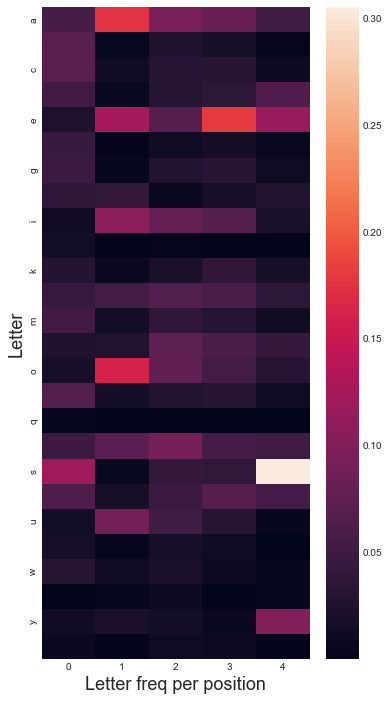

In [7]:
createHeatmap(lpMap)
plt.ylabel('Letter', fontsize=18)
plt.xlabel("Letter freq per position", fontsize=18)

Text(0.5, 19.5, 'Letter freq per position')

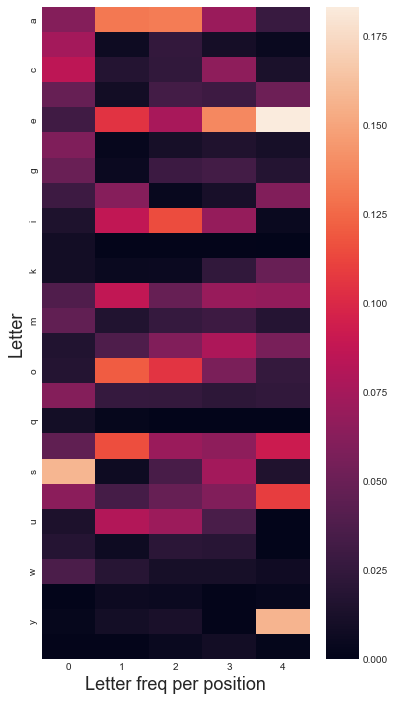

In [8]:
createHeatmap(curatedLpMap)
plt.ylabel('Letter', fontsize=18)
plt.xlabel("Letter freq per position", fontsize=18)
